In [40]:
import sys
sys.path

['',
 'C:\\Users\\user\\Anaconda2\\python27.zip',
 'C:\\Users\\user\\Anaconda2\\DLLs',
 'C:\\Users\\user\\Anaconda2\\lib',
 'C:\\Users\\user\\Anaconda2\\lib\\plat-win',
 'C:\\Users\\user\\Anaconda2\\lib\\lib-tk',
 'C:\\Users\\user\\Anaconda2',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages\\win32',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages\\pywinpty-0.5-py2.7-win-amd64.egg',
 'C:\\Users\\user\\Anaconda2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\user\\.ipython']

In [41]:
#Setting working directory
import os
path = "C:\Users\user\Desktop\python"
os.chdir(path)
print(os.getcwd())

C:\Users\user\Desktop\python


In [42]:
import pandas as pd

Data = pd.read_csv("LGD_DATA.csv")


In [43]:
Data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024.0,24.0,5.0,1,M,Married,203.319595
1,144880.0,31.0,NaN,1,F,Single,402.197302
2,133742.0,56.0,37.0,1,m,Married,553.132096
3,151282.0,52.0,31.0,1,F,Married,292.430579
4,174407.0,20.0,3.0,1,M,Single,246.540576


In [44]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 7 columns):
Ac_No                  15298 non-null float64
Age                    15302 non-null float64
Years of Experience    15302 non-null float64
Number of Vehicles     15304 non-null int64
Gender                 15304 non-null object
Married                15303 non-null object
Losses in Thousands    15303 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 837.0+ KB


In [45]:
Data.shape 

(15304, 7)

In [46]:
Data.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15298.000000,15302.000000,15302.000000,15304.000000,15303.000000
mean,149994.956138,42.350673,23.713044,2.494511,389.995815
std,28947.371972,19.023309,17.855253,0.954412,253.910580
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124942.250000,24.000000,6.000000,2.000000,226.583750
50%,150011.500000,42.000000,23.000000,2.000000,354.966724
75%,175044.750000,61.000000,42.000000,3.000000,488.725644
max,200454.000000,690.000000,53.000000,4.000000,3500.000000


In [47]:
Data[Data.duplicated(keep= False)]
len(Data[Data.duplicated(keep= False)])

Data = Data.drop_duplicates(keep='first')
len(Data[Data.duplicated(keep= False)])

len(Data)


15291

In [48]:
Data[Data.duplicated(subset = ['Ac_No'],  keep= False)]

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
6,NaN,36.0,19.0,1,F,Single,462.158856
7,NaN,67.0,49.0,1,F,Married,168.934036
10,154894.0,19.0,1.0,1,M,Single,763.729857
15,154894.0,19.0,1.0,1,m,Single,763.729857
45,NaN,31.0,12.0,1,M,Married,670.892175
46,NaN,30.0,13.0,1,M,Single,446.750830
47,NaN,64.0,47.0,1,M,Married,109.026343
48,NaN,68.0,47.0,1,F,Married,119.733044


In [49]:
len(Data[Data.duplicated(keep= False)])

0

In [50]:
set(Data['Gender'])

{'F', 'M', 'Z', 'f', 'm', 'v'}

In [51]:
set(Data['Married'])

{nan, 'Married', 'Single'}

In [52]:
Data.groupby('Gender')['Ac_No'].count().reset_index(name = "Count")

,Gender,Count
0,F,7741
1,M,7535
2,Z,1
3,f,2
4,m,3
5,v,3


In [53]:
Data[Data['Gender'] == 'm']['Gender'] 

2     m
15    m
27    m
Name: Gender, dtype: object

In [54]:
Data["Gender"].replace(["m"], "M", inplace=True)

In [55]:
Data.groupby('Gender')['Ac_No'].count().reset_index(name = "Count")

,Gender,Count
0,F,7741
1,M,7538
2,Z,1
3,f,2
4,v,3


In [56]:
Data["Gender"].replace(["f"], "F", inplace=True)
Data.groupby('Gender')['Ac_No'].count().reset_index(name = "Count")
Data["Gender"].replace(["Z",  "v"], float('nan'), inplace=True)
Data.groupby('Gender')['Ac_No'].count().reset_index(name = "Count")

,Gender,Count
0,F,7743
1,M,7538


In [57]:
set(Data['Gender'])
Data[Data.duplicated(keep= False)]

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
10,154894.0,19.0,1.0,1,M,Single,763.729857
15,154894.0,19.0,1.0,1,M,Single,763.729857


In [58]:
Data = Data.drop_duplicates(keep='first')
len(Data[Data.duplicated(keep= False)])

0

In [59]:
#outlier treatment
import matplotlib.pyplot as plt


In [60]:
Data.columns

Index([u'Ac_No', u'Age', u'Years of Experience', u'Number of Vehicles',
       u'Gender', u'Married', u'Losses in Thousands'],
      dtype='object')

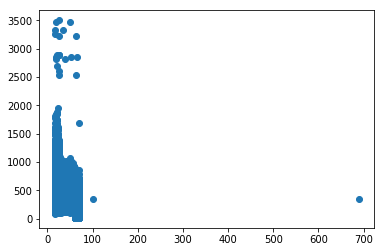

In [61]:
plt.scatter(Data['Age'], Data['Losses in Thousands'])

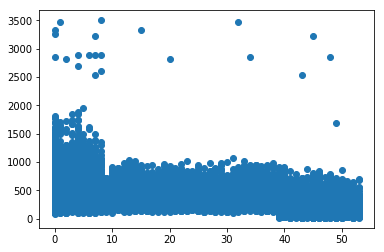

In [62]:
plt.scatter(Data['Years of Experience'], Data['Losses in Thousands'])

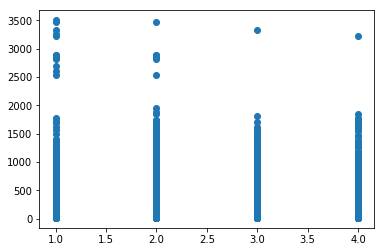

In [63]:
plt.scatter(Data['Number of Vehicles'], Data['Losses in Thousands'])

In [65]:
q = Data["Age"].quantile(0.99)
q

70.0

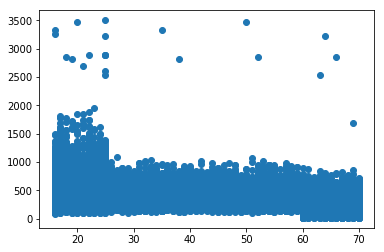

In [66]:
Data = Data[ (Data["Age"] <= q) | (Data["Age"].isnull())]
plt.scatter(Data['Age'], Data['Losses in Thousands'])

In [67]:
q = Data["Years of Experience"].quantile(0.99)
q

52.0

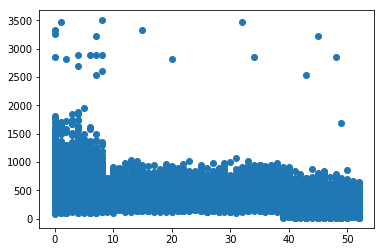

In [68]:
Data = Data[(Data["Years of Experience"] <= q) | (Data["Years of Experience"].isnull())]
plt.scatter(Data["Years of Experience"], Data['Losses in Thousands'])

In [69]:
q = Data['Number of Vehicles'].quantile(0.99)
q

4.0

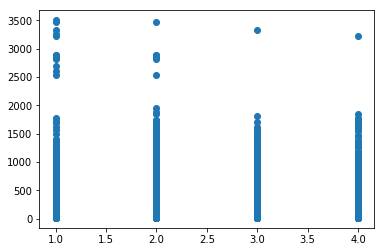

In [70]:
Data = Data[(Data['Number of Vehicles'] <= q) | (Data["Number of Vehicles"].isnull())]
plt.scatter(Data['Number of Vehicles'], Data['Losses in Thousands'])

In [71]:
Data.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15184.000000,15188.000000,15188.000000,15190.000000,15189.000000
mean,149968.156546,42.146563,23.540690,2.495853,391.100876
std,28950.165665,18.201678,17.751442,0.953706,254.094233
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124907.500000,24.000000,6.000000,2.000000,227.754050
50%,149901.000000,42.000000,23.000000,2.000000,356.043393
75%,175030.750000,61.000000,42.000000,3.000000,489.774795
max,200454.000000,70.000000,52.000000,4.000000,3500.000000


In [72]:
#missing value treatment
Data[Data.isnull().any(axis=1)]

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
1,144880.0,31.0,NaN,1,F,Single,402.197302
6,NaN,36.0,19.0,1,F,Single,462.158856
7,NaN,67.0,49.0,1,F,Married,168.934036
45,NaN,31.0,12.0,1,M,Married,670.892175
46,NaN,30.0,13.0,1,M,Single,446.750830
47,NaN,64.0,47.0,1,M,Married,109.026343
48,NaN,68.0,47.0,1,F,Married,119.733044
114,161398.0,54.0,34.0,1,NaN,Married,314.085069
126,176699.0,68.0,49.0,1,NaN,Married,235.135763
129,167022.0,NaN,NaN,1,NaN,Married,314.681989


In [73]:
Data = Data.drop('Ac_No', axis = 1)

In [74]:
Data[Data.isnull().any(axis=1)]

,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
1,31.0,NaN,1,F,Single,402.197302
114,54.0,34.0,1,NaN,Married,314.085069
126,68.0,49.0,1,NaN,Married,235.135763
129,NaN,NaN,1,NaN,Married,314.681989
132,NaN,1.0,1,NaN,NaN,NaN


In [75]:
Data = Data.drop([132, 129], axis = 0)

Data[Data.isnull().any(axis=1)]

,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
1,31.0,NaN,1,F,Single,402.197302
114,54.0,34.0,1,NaN,Married,314.085069
126,68.0,49.0,1,NaN,Married,235.135763


In [76]:
Data['Years of Experience'].mean()
m = Data['Years of Experience'].mean()
Data = Data.fillna({'Gender' : 'F', 'Years of Experience' : m})


In [77]:
Data[Data.isnull().any(axis=1)]

,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands


In [78]:
Data.corr()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Age,1.000000,0.997155,0.008387,-0.439402
Years of Experience,0.997155,1.000000,0.008526,-0.438546
Number of Vehicles,0.008387,0.008526,1.000000,-0.012431
Losses in Thousands,-0.439402,-0.438546,-0.012431,1.000000


In [80]:
import statsmodels.formula.api as sm

In [81]:
result = sm.ols(formula="Losses in Thousands  ~ Age", data = Data).fit()

NameError: name 'Losses' is not defined

In [82]:
Data.columns

Index([u'Age', u'Years of Experience', u'Number of Vehicles', u'Gender',
       u'Married', u'Losses in Thousands'],
      dtype='object')

In [83]:
Data = Data.rename(index=str, columns={"Years of Experience": "YOE", "Number of Vehicles": "NOV", "Losses in Thousands" : "LIT"})
Data.columns

Index([u'Age', u'YOE', u'NOV', u'Gender', u'Married', u'LIT'], dtype='object')

In [84]:
result = sm.ols(formula="LIT  ~ Age + NOV + Gender + Married", data = Data).fit()

In [85]:
print (result.params)

Intercept            545.335115
Gender[T.M]           94.268816
Married[T.Single]    135.306466
Age                   -6.161593
NOV                   -2.981287
dtype: float64


In [86]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    LIT   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1621.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:54:33   Log-Likelihood:            -1.0296e+05
No. Observations:               15188   AIC:                         2.059e+05
Df Residuals:                   15183   BIC:                         2.060e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           545.3351      6.67

In [87]:
result = sm.ols(formula="LIT  ~ Age + YOE + Gender + Married", data = Data).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    LIT   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1622.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:55:17   Log-Likelihood:            -1.0296e+05
No. Observations:               15188   AIC:                         2.059e+05
Df Residuals:                   15183   BIC:                         2.060e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           495.3523     23.11

In [88]:
result = sm.ols(formula="LIT  ~ Age + Gender + Married", data = Data).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    LIT   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     2160.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:55:32   Log-Likelihood:            -1.0296e+05
No. Observations:               15188   AIC:                         2.059e+05
Df Residuals:                   15184   BIC:                         2.060e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           537.9734      4.95

In [89]:
result.predict(Data[['Age', 'Gender',  'Married']])


0        484.336899
1        482.175363
2        287.124220
3        217.502833
4        644.240193
5        453.522418
6        451.360882
7        125.059390
8        342.258280
9        574.618806
10       650.403089
11       494.501155
26       414.715511
27       219.332362
28       348.753182
29       280.961324
30       366.909865
31       644.240193
32       354.584072
33       250.146843
34       402.057713
35       662.728882
36       494.501155
37       266.473996
38       537.641429
39       564.122543
40       112.733598
41       391.893456
42       285.294691
43       414.715511
            ...    
15274    354.584072
15275    353.086549
15276    106.570702
15277    284.962685
15278    207.006570
15279    199.014145
15280    404.219248
15281    496.330685
15282    352.754543
15283    385.398553
15284    662.728882
15285    496.662691
15286    457.523778
15287    112.733598
15288    638.077297
15289    537.641429
15290    527.145166
15291    570.285439
15292    527.477172
